This notebook is used to make plots for the report.

In [1]:
import json
import matplotlib.pyplot as plt
import math

### Checking the AADT Data from NYS

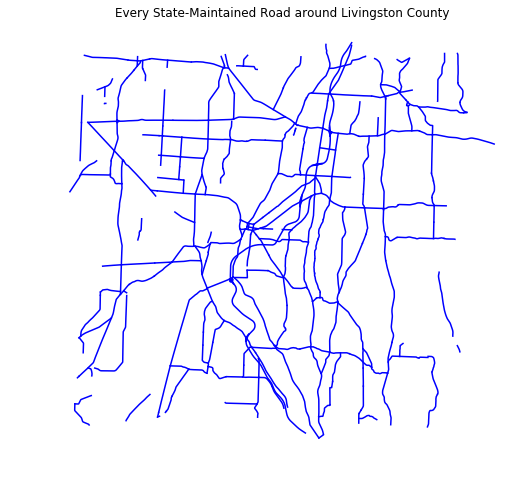

In [2]:
f = open("stats/NYS_livingston.txt", 'r')
plt.figure(figsize=(8,8))
for line in f:
    road = json.loads(line)
    x = [a for (a,b) in road['coordinates']]
    y = [b for (a,b) in road['coordinates']]
    plt.plot(x,y, color = 'blue')
f.close()
plt.axes().set_aspect('equal', 'datalim')
plt.title("Every State-Maintained Road around Livingston County")
plt.axis('off')
plt.show()

### Checking the Merged Data

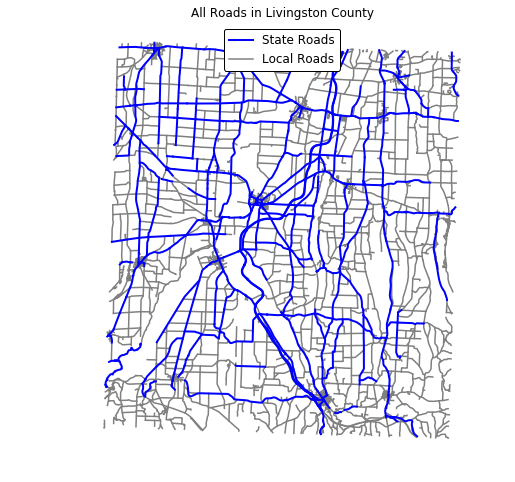

In [3]:
f = open("stats/livingston_roads.txt", 'r')
plt.figure(figsize=(8,8))
for line in f:
    road = json.loads(line)
    x = [a for (a,b) in road['coordinates']]
    y = [b for (a,b) in road['coordinates']]
    
    # put the state roads on top, in blue
    if road['AADT'] != None:
        l1, = plt.plot(x,y, color = 'blue',lw = 2, zorder = 2)
    # put the local roads on bottom, in gray
    else:
        l2, = plt.plot(x,y, color = 'gray', zorder = 1)
f.close()
plt.axes().set_aspect('equal','datalim')
plt.title("All Roads in Livingston County")
plt.legend([l1,l2] , ["State Roads", "Local Roads"], loc = 9,prop={'size': 12}, framealpha = 1, edgecolor = 'black')
plt.axis('off')
plt.savefig('livingston_county.png')
plt.show()

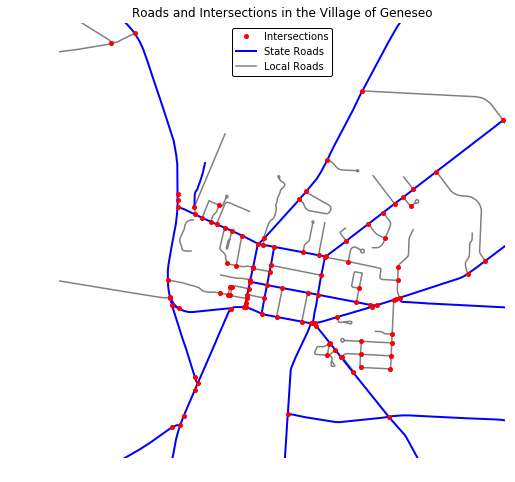

In [8]:
plt.figure(figsize=(8,8))
# plot a dot for every intersection
f = open("stats/livingston_intersections.txt",'r')
for line in f:
    intsec = json.loads(line)[0]
    x = intsec[0]
    y = intsec[1]
    
    # if the intersection is in Geneseo
    if 267500 - 1000 < x < 272500 + 1000 and 4741000 - 1000 < y < 4744000 + 1000:
        l3, = plt.plot([x],[y], 'ro', zorder = 3, ms = 4)
f.close()

# plot the roads
f = open("stats/livingston_roads.txt",'r')
for line in f:
    road = json.loads(line)
    
    # check if the road is in Geneseo
    avg_x = sum([a for (a,b) in road['coordinates']])/len(road['coordinates'])
    avg_y = sum([b for (a,b) in road['coordinates']])/len(road['coordinates'])
    if 267500 - 2000 < avg_x < 272500 + 2000 and 4741000 - 2000 < avg_y < 4744000 + 2000:
        x = [a for (a,b) in road['coordinates']]
        y = [b for (a,b) in road['coordinates']]

        # put the state roads on top, in blue
        if road['AADT'] != None:
            l1, = plt.plot(x,y, color = 'blue',lw = 2, zorder = 2)
        # put the local roads on bottom, in gray
        else:
            l2, = plt.plot(x,y, color = 'gray', zorder = 1)
f.close()
plt.xlim(267500,272500)
plt.ylim(4741000,4744000)
plt.axes().set_aspect('equal','datalim')
plt.axis('off')
plt.legend([l3,l1,l2],['Intersections', 'State Roads', 'Local Roads'], loc = 9, framealpha = 1, edgecolor = 'black')
plt.title("Roads and Intersections in the Village of Geneseo")
plt.show()

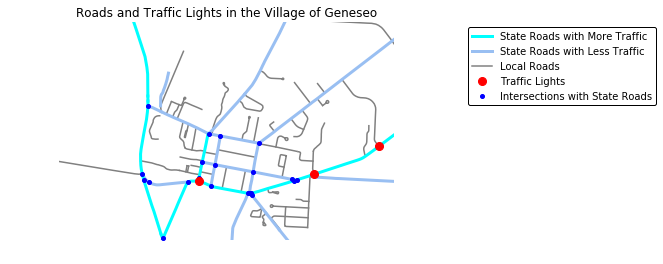

In [24]:
# plot the roads
f = open("stats/livingston_roads.txt",'r')
for line in f:
    road = json.loads(line)
    
    # check if the road is in Geneseo
    avg_x = sum([a for (a,b) in road['coordinates']])/len(road['coordinates'])
    avg_y = sum([b for (a,b) in road['coordinates']])/len(road['coordinates'])
    if 267500 - 2000 < avg_x < 272500 + 2000 and 4741000 - 2000 < avg_y < 4744000 + 2000:
        x = [a for (a,b) in road['coordinates']]
        y = [b for (a,b) in road['coordinates']]

        # put the state roads on top, in blue
        if road['AADT'] != None:
            
            # if AADT > 5000
            if road['AADT'] >= 5000:
                l1, = plt.plot(x,y, color = 'cyan',lw = 3, zorder = 3)
            # if AADT < 5000
            else:
                l2, = plt.plot(x,y, color = (.6,.75,.95),lw = 3, zorder = 2)
        # put the local roads on bottom, in gray
        else:
            l3, = plt.plot(x,y, color = 'gray', zorder = 1)
f.close()

# plot the intersections
g = open("stats/livingston_intersections_plus.txt.",'r')
for line in g:
    int_plus = json.loads(line)
    x = int_plus['coordinates'][0]
    y = int_plus['coordinates'][1]
    if 267500 - 1000 < x < 272500 + 1000 and 4741000 - 1000 < y < 4744000 + 1000 and\
    (int_plus['num state directions'] > 2 or int_plus['traffic light'] == 1):
        if int_plus['traffic light'] == 1:
            l4, = plt.plot([x], [y], 'ro', ms = 8, zorder = 5)
        else:
            l5, = plt.plot([x], [y], 'bo', ms = 4, zorder = 4)
g.close()
plt.xlim(267500,272500)
plt.ylim(4741000,4744000)
plt.axes().set_aspect('equal','datalim')
plt.axis('off')
plt.legend([l1,l2,l3,l4,l5],['State Roads with More Traffic', 'State Roads with Less Traffic',\
                             'Local Roads', 'Traffic Lights', 'Intersections with State Roads'], loc = 1, \
                              bbox_to_anchor=(1.8, 1), framealpha = 1, edgecolor = 'black')
plt.title("Roads and Traffic Lights in the Village of Geneseo")
plt.show()

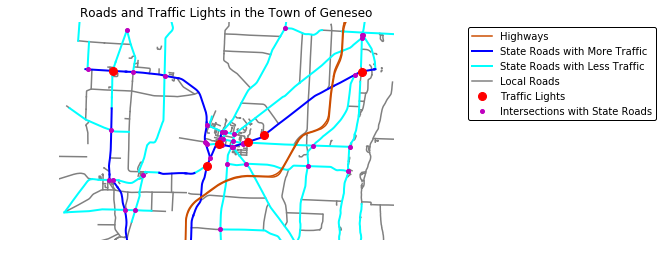

In [25]:
# plot the roads
f = open("stats/livingston_roads.txt",'r')
for line in f:
    road = json.loads(line)
    
    # check if the road is in Geneseo
    avg_x = sum([a for (a,b) in road['coordinates']])/len(road['coordinates'])
    avg_y = sum([b for (a,b) in road['coordinates']])/len(road['coordinates'])
    if 262500 - 2000 < avg_x < 277500 + 2000 and 4736000 - 2000 < avg_y < 4749000 + 2000:
        x = [a for (a,b) in road['coordinates']]
        y = [b for (a,b) in road['coordinates']]
        
        # plot the highways separately
        if road['road type'] == 'motorway':
            l0, = plt.plot(x,y, color = (.8,.3,0), zorder = 5)
        
        else:
            # put the state roads on top, in blue
            if road['AADT'] != None:

                # if AADT > 5000
                if road['AADT'] >= 5000:
                    l1, = plt.plot(x,y, color = 'blue',lw = 2, zorder = 3)
                # if AADT < 5000
                else:
                    l2, = plt.plot(x,y, color = 'cyan',lw = 2, zorder = 2)
            # put the local roads on bottom, in gray
            else:
                l3, = plt.plot(x,y, color = 'gray', zorder = 1)
f.close()

# plot the intersections
g = open("stats/livingston_intersections_plus.txt.",'r')
for line in g:
    int_plus = json.loads(line)
    x = int_plus['coordinates'][0]
    y = int_plus['coordinates'][1]
    if 262500 - 1000 < x < 277500 + 1000 and 4736000 - 1000 < y < 4749000 + 1000 and\
    (int_plus['num state directions'] > 2 or int_plus['traffic light'] == 1):
        if int_plus['traffic light'] == 1:
            l4, = plt.plot([x], [y], 'ro', ms = 8, zorder = 5)
        else:
            l5, = plt.plot([x], [y], 'mo', ms = 4, zorder = 4)
g.close()
plt.xlim(262500,277500)
plt.ylim(4736000,4749000)
plt.axes().set_aspect('equal','datalim')
plt.axis('off')
plt.legend([l0,l1,l2,l3,l4,l5],['Highways', 'State Roads with More Traffic', 'State Roads with Less Traffic',\
                             'Local Roads', 'Traffic Lights', 'Intersections with State Roads'], loc = 1, \
                              bbox_to_anchor=(1.8, 1), framealpha = 1, edgecolor = 'black')
plt.title("Roads and Traffic Lights in the Town of Geneseo")
plt.show()

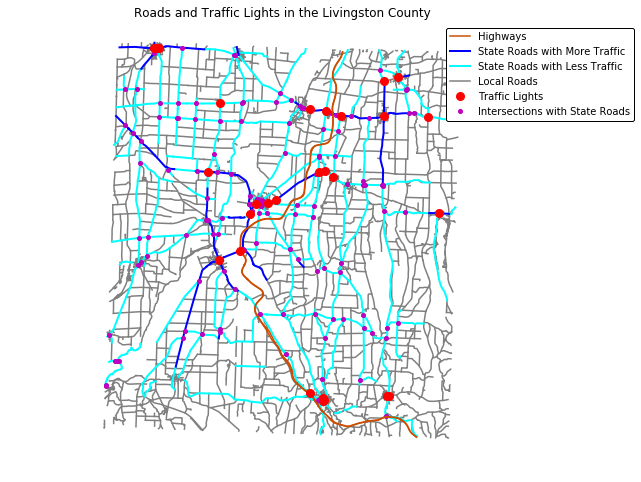

In [69]:
# plot the roads
plt.figure(figsize=(8,8))
f = open("stats/livingston_roads.txt",'r')
for line in f:
    road = json.loads(line)
    
    x = [a for (a,b) in road['coordinates']]
    y = [b for (a,b) in road['coordinates']]
    # plot the highways separately
    if road['road type'] == 'motorway':
        l0, = plt.plot(x,y, color = (.8,.3,0), zorder = 5)
    else:
        # put the state roads on top, in blue
        if road['AADT'] != None:
            # if AADT > 5000
            if road['AADT'] >= 5000:
                l1, = plt.plot(x,y, color = 'blue',lw = 2, zorder = 3)
            # if AADT < 5000
            else:
                l2, = plt.plot(x,y, color = 'cyan',lw = 2, zorder = 2)
        # put the local roads on bottom, in gray
        else:
            l3, = plt.plot(x,y, color = 'gray', zorder = 1)
f.close()

# plot the intersections
g = open("stats/livingston_intersections_plus.txt.",'r')
for line in g:
    int_plus = json.loads(line)
    x = int_plus['coordinates'][0]
    y = int_plus['coordinates'][1]
    if (int_plus['num state directions'] > 2 or int_plus['traffic light'] == 1):
        if int_plus['traffic light'] == 1:
            l4, = plt.plot([x], [y], 'ro', ms = 8, zorder = 5)
        else:
            l5, = plt.plot([x], [y], 'mo', ms = 4, zorder = 4)
g.close()
plt.axes().set_aspect('equal','datalim')
plt.axis('off')
plt.legend([l0,l1,l2,l3,l4,l5],['Highways', 'State Roads with More Traffic', 'State Roads with Less Traffic',\
                             'Local Roads', 'Traffic Lights', 'Intersections with State Roads'], loc = 1, \
                              bbox_to_anchor=(1.3, 1), framealpha = 1, edgecolor = 'black')
plt.title("Roads and Traffic Lights in the Livingston County")
plt.show()

### Histograms for AADT by Road Type

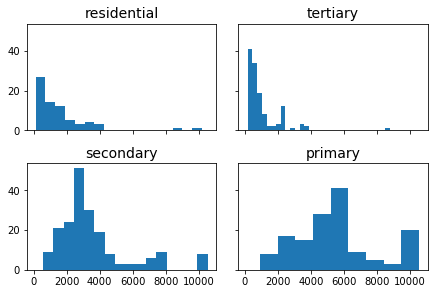

residential
-------------
Mean AADT: 1577.629
Standard Deviation: 1711.202
Number: 70




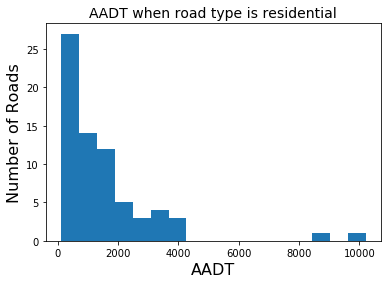

tertiary
-------------
Mean AADT: 1005.469
Standard Deviation: 1087.347
Number: 128




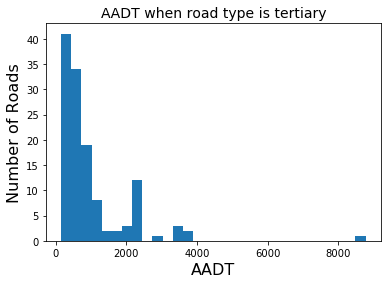

secondary
-------------
Mean AADT: 3592.758
Standard Deviation: 2171.665
Number: 194




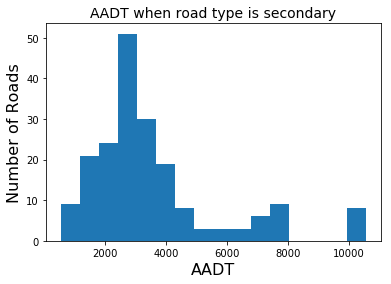

primary
-------------
Mean AADT: 5536.308
Standard Deviation: 2471.511
Number: 146




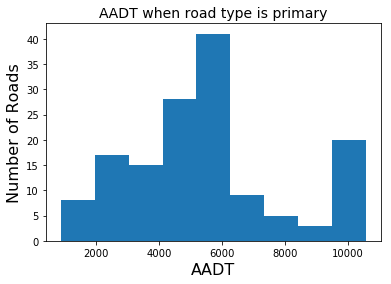

motorway
-------------
Mean AADT: 14052.186
Standard Deviation: 5773.943
Number: 59




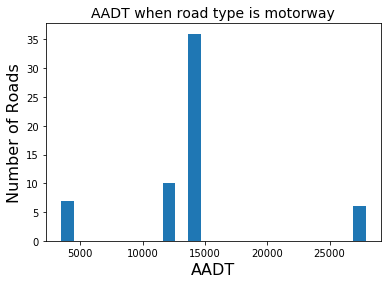

In [130]:
# making lists of the AADTs for each road type
AADT_by_type = {'residential':[], 'tertiary':[], 'secondary':[], 'primary':[], 'motorway':[]}
f = open("stats/livingston_roads.txt",'r')
for line in f:
    road = json.loads(line)
    if road['AADT'] != None:
        AADT_by_type[road['road type']].append(road['AADT'])
f.close()




names = ['residential', 'tertiary', 'secondary', 'primary']
fig, axarr = plt.subplots(2,2, sharey = True, sharex = True)
for i in range(4):
    values = AADT_by_type[names[i]]
    axarr[(i//2),i%2].hist(values, bins = 'auto')
    axarr[(i//2),i%2].set_title(names[i], fontsize = 14)
    plt.tight_layout(pad=0.4, w_pad=1.5, h_pad=1.0)
plt.savefig("roadtypehists.png")
plt.show()






for road_type in AADT_by_type:
    values = AADT_by_type[road_type]
    meanvalue = sum(values)/len(values)
    stdv = math.sqrt(sum([(v - meanvalue)**2 for v in values])/len(values))
    print(road_type)
    print("-------------")
    print("Mean AADT: {:.3f}".format(sum(values)/len(values)))
    print("Standard Deviation: {:.3f}".format(stdv))
    print("Number: {}\n\n".format(len(values)))

### Removing Outliers for MMI

In [131]:
# making lists of the AADTs for each road type, ignoring outliers
AADT_by_type = {'residential':[], 'tertiary':[], 'secondary':[], 'primary':[], 'motorway':[]}
f = open("stats/livingston_roads.txt",'r')
for line in f:
    road = json.loads(line)
    if road['AADT'] != None:
        if not road['road type'] in ['residential','tertiary','secondary'] or road['AADT'] < 8000:
            AADT_by_type[road['road type']].append(road['AADT'])
f.close()

for road_type in AADT_by_type:
    values = AADT_by_type[road_type]
    meanvalue = sum(values)/len(values)
    stdv = math.sqrt(sum([(v - meanvalue)**2 for v in values])/len(values))
    print(road_type)
    print("-------------")
    print("Mean AADT: {:.3f}".format(sum(values)/len(values)))
    print("Standard Deviation: {:.3f}".format(stdv))
    print("Number: {}\n\n".format(len(values)))

residential
-------------
Mean AADT: 1348.691
Standard Deviation: 1076.605
Number: 68


tertiary
-------------
Mean AADT: 944.299
Standard Deviation: 844.212
Number: 127


secondary
-------------
Mean AADT: 3293.608
Standard Deviation: 1657.956
Number: 186


primary
-------------
Mean AADT: 5536.308
Standard Deviation: 2471.511
Number: 146


motorway
-------------
Mean AADT: 14052.186
Standard Deviation: 5773.943
Number: 59




### Histograms for Number of Roads with a Given AADT

29


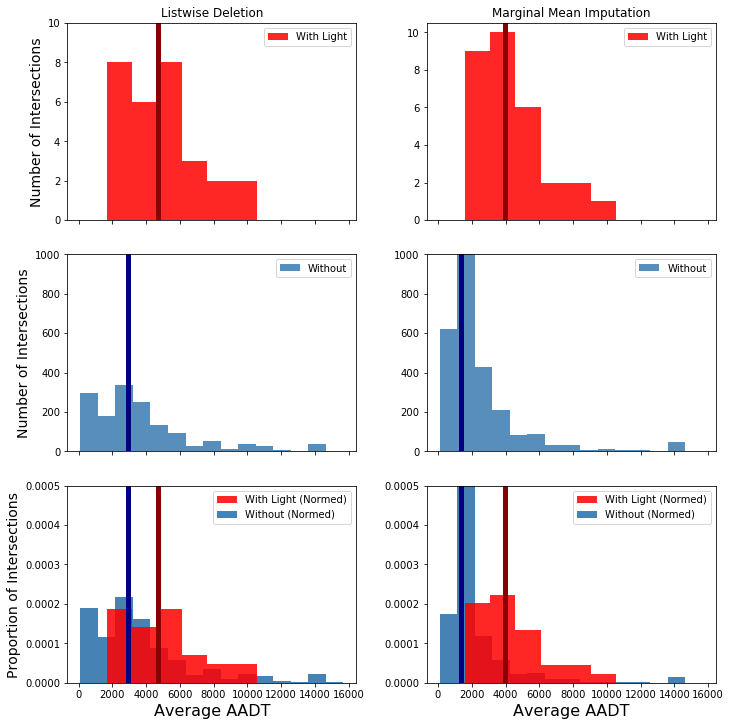

In [171]:
# the plain intersection data, with average AADT done by ignoring local roads
f = open("stats/livingston_intersections_plus.txt",'r')
with_light = []
without = []
for line in f:
    int_plus = json.loads(line)
    
    if int_plus['traffic light'] == 1 and int_plus['average AADT'] != None:
        with_light.append(int_plus['average AADT'])
    # remove things past 20000 to avoid outliers
    elif int_plus['average AADT'] != None and int_plus['average AADT'] < 20000:
        without.append(int_plus['average AADT'])
f.close()

print(len(with_light))

# the intersections data with AADT by MMI on local roads
f = open("stats/livingston_intersections_mmi.txt",'r')
with_light_mmi = []
without_mmi = []
for line in f:
    int_plus = json.loads(line)
    
    if int_plus['traffic light'] == 1:
        with_light_mmi.append(int_plus['average AADT'])
    # remove things past 20000 to avoid outliers
    elif int_plus['average AADT'] < 20000:
        without_mmi.append(int_plus['average AADT'])
f.close()

fig, axarr = plt.subplots(3,2, sharex = True, figsize = (10,10))

axarr[0,0].hist(with_light, color = 'red', bins = 'auto', alpha = .85, label = "With Light")
axarr[0,0].axvline(sorted(with_light)[len(with_light)//2], lw = 5, color = 'darkred')
axarr[0,0].set_ylim(0,10)
axarr[0,0].set_title("Listwise Deletion")
axarr[0,0].set_ylabel("Number of Intersections", fontsize = 14)
axarr[0,0].legend()

axarr[0,1].hist(with_light_mmi, color = 'red', bins = 'auto', alpha = .85, label = "With Light")
axarr[0,1].axvline(sorted(with_light_mmi)[len(with_light_mmi)//2], lw = 5, color = 'darkred')
axarr[0,1].set_title("Marginal Mean Imputation")
axarr[0,1].legend()

axarr[1,0].hist(without, color = 'steelblue', bins = 15, alpha = .9, label = "Without")
axarr[1,0].axvline(sorted(without)[len(without)//2], lw = 5, color = 'navy')
axarr[1,0].set_ylim(0,1000)
axarr[1,0].set_ylabel("Number of Intersections", fontsize = 14)
axarr[1,0].legend()

axarr[1,1].hist(without_mmi, color = 'steelblue', bins = 15, alpha = .9, label = "Without")
axarr[1,1].axvline(sorted(without_mmi)[len(without_mmi)//2], lw = 5, color = 'navy')
axarr[1,1].set_ylim(0,1000)
axarr[1,1].legend()


axarr[2,0].hist(with_light, zorder = 2, normed = True, alpha = .85, bins = 'auto', color = 'red',\
                label = "With Light (Normed)")
axarr[2,0].hist(without, normed = True, bins =15, color = 'steelblue', label = "Without (Normed)")
axarr[2,0].axvline(sorted(without)[len(without)//2], lw = 5, color = 'navy')
axarr[2,0].axvline(sorted(with_light)[len(with_light)//2], lw = 5, color = 'darkred')
axarr[2,0].set_ylim(0,.0005)
axarr[2,0].legend(loc="upper right")
axarr[2,0].set_xlabel("Average AADT", fontsize = 16)
axarr[2,0].set_ylabel("Proportion of Intersections", fontsize = 14)


axarr[2,1].hist(with_light_mmi, zorder = 2, normed = True, alpha = .85, bins = 'auto',\
                color = 'red', label = "With Light (Normed)")
axarr[2,1].hist(without_mmi, normed = True, bins =15, color = 'steelblue', label = "Without (Normed)")
axarr[2,1].axvline(sorted(without_mmi)[len(without_mmi)//2], lw = 5, color = 'navy')
axarr[2,1].axvline(sorted(with_light_mmi)[len(with_light_mmi)//2], lw = 5, color = 'darkred')
axarr[2,1].set_ylim(0,.0005)
axarr[2,1].set_xlabel("Average AADT", fontsize = 16)
axarr[2,1].legend(loc="upper right")

plt.tight_layout(pad=0.4, w_pad=2.5, h_pad=1.5)
plt.savefig("mmihists.png")
plt.show()

### Using the Weighted Mean AADT

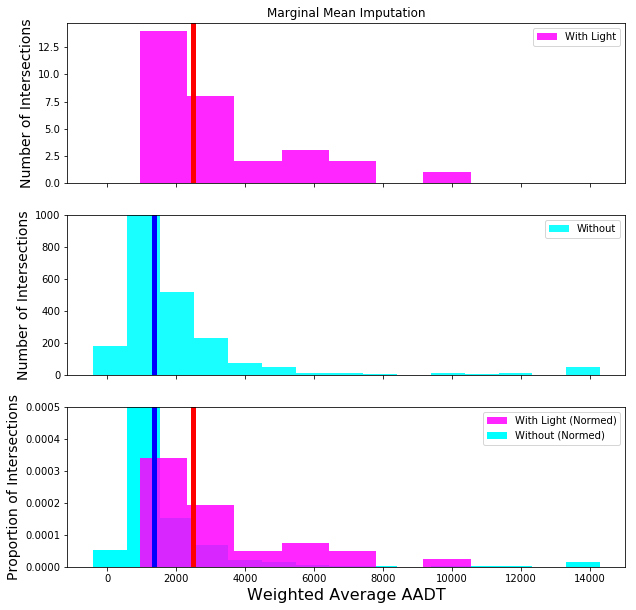

In [177]:
def weighted_AADT(int_plus):
    ''' computes the weighted average AADT for the road
        assumes we are using mmi data'''
    mu = int_plus['average AADT']
    stdv = int_plus['AADT stdv']
    if int_plus['num directions'] == 3:
        return mu*(-1/math.sqrt(2)/mu*stdv + 1)
    else:
        return mu*(-1/mu*stdv + 1)
    
f = open("stats/livingston_intersections_mmi.txt",'r')
with_light_mmi = []
without_mmi = []
for line in f:
    int_plus = json.loads(line)
    
    if int_plus['traffic light'] == 1:
        with_light_mmi.append(weighted_AADT(int_plus))
    # remove things past 20000 to avoid outliers
    elif int_plus['average AADT'] < 20000:
        without_mmi.append(weighted_AADT(int_plus))
f.close()

fig, axarr = plt.subplots(3,1, sharex = True, figsize = (10,10))

axarr[0].hist(with_light_mmi, color = 'magenta', bins = 'auto', alpha = .85, label = "With Light")
axarr[0].axvline(sorted(with_light_mmi)[len(with_light_mmi)//2], lw = 5, color = 'red')
axarr[0].set_title("Marginal Mean Imputation")
axarr[0].legend()
axarr[0].set_ylabel("Number of Intersections", fontsize = 14)

axarr[1].hist(without_mmi, color = 'cyan', bins = 15, alpha = .9, label = "Without")
axarr[1].axvline(sorted(without_mmi)[len(without_mmi)//2], lw = 5, color = 'blue')
axarr[1].set_ylim(0,1000)
axarr[1].legend()
axarr[1].set_ylabel("Number of Intersections", fontsize = 14)

axarr[2].hist(with_light_mmi, zorder = 2, normed = True, alpha = .85, bins = 'auto',\
                color = 'magenta', label = "With Light (Normed)")
axarr[2].hist(without_mmi, normed = True, bins =15, color = 'cyan', label = "Without (Normed)")
axarr[2].axvline(sorted(without_mmi)[len(without_mmi)//2], lw = 5, color = 'blue')
axarr[2].axvline(sorted(with_light_mmi)[len(with_light_mmi)//2], lw = 5, color = 'red')
axarr[2].set_ylim(0,.0005)
axarr[2].set_xlabel("Weighted Average AADT", fontsize = 16)
axarr[2].legend(loc="upper right")
axarr[2].set_ylabel("Proportion of Intersections", fontsize = 14)

plt.savefig("weightedhists.png")
plt.show()

### Map of Outlier Intersections

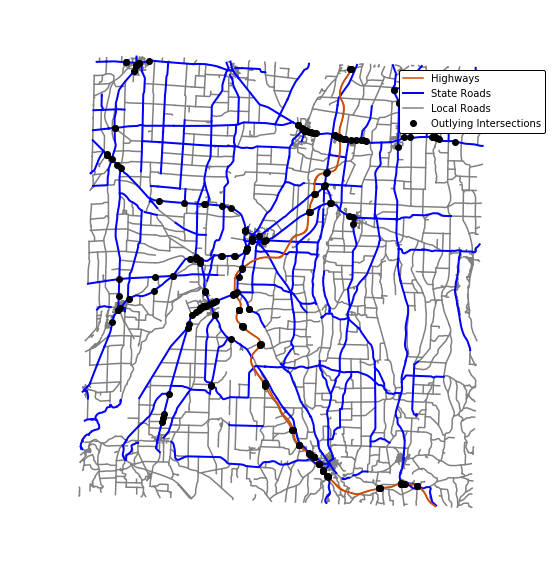

In [188]:
plt.figure(figsize=(8,10))
f = open("stats/livingston_roads.txt",'r')
for line in f:
    road = json.loads(line)
    
    x = [a for (a,b) in road['coordinates']]
    y = [b for (a,b) in road['coordinates']]
    # plot the highways separately
    if road['road type'] == 'motorway':
        l0, = plt.plot(x,y, color = (.8,.3,0), zorder = 4)
    else:
        # put the state roads on top, in blue
        if road['AADT'] != None:
            
            l1, = plt.plot(x,y, color = 'blue',lw = 2, zorder = 3)
        
        # put the local roads on bottom, in gray
        else:
            l3, = plt.plot(x,y, color = 'gray', zorder = 1)
f.close()

f = open("stats/livingston_intersections_mmi.txt",'r')

for line in f:
    int_plus = json.loads(line)
    
    # the cutoff point for having a 'high' score
    if weighted_AADT(int_plus) > 3500 and int_plus['traffic light'] == 0:
        l4, = plt.plot([int_plus['coordinates'][0]], [int_plus['coordinates'][1]],'ko', zorder = 5)
f.close()
plt.legend([l0,l1,l3,l4],["Highways","State Roads",\
                             "Local Roads"\
                            ,"Outlying Intersections"],loc = 1, \
                              bbox_to_anchor=(1.1, .9), framealpha = 1, edgecolor = 'black')
plt.axes().set_aspect('equal','datalim')
plt.axis('off')
plt.savefig("outlyingints.png")
plt.show()

30
3447


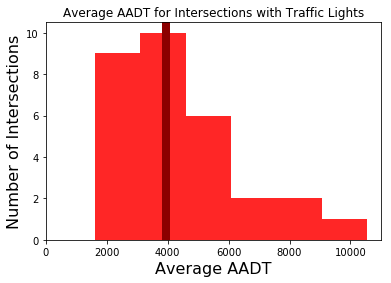

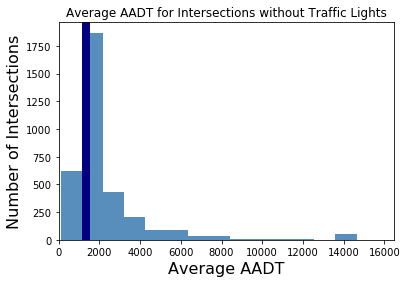

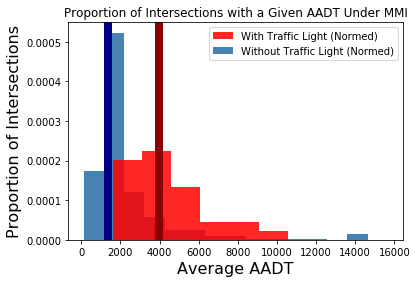

In [198]:
f = open("stats/livingston_intersections_mmi.txt",'r')
with_light = []
without = []
for line in f:
    int_plus = json.loads(line)
    
    # if there are at least 3 state directions
    if int_plus['num state directions'] > -1:
        if int_plus['traffic light'] == 1 and int_plus['average AADT'] != None:
            with_light.append(int_plus['average AADT'])
        elif int_plus['average AADT'] != None and int_plus['average AADT'] < 20000:
            without.append(int_plus['average AADT'])
f.close()

print(len(with_light))
print(len(without))

plt.hist(with_light, color = 'red', bins = 'auto', alpha = .85)
plt.xlim(0)
plt.xlabel("Average AADT", fontsize = 16)
plt.ylabel("Number of Intersections", fontsize = 16)
plt.axvline(sorted(with_light)[len(with_light)//2], lw = 8, color = 'darkred')
plt.title("Average AADT for Intersections with Traffic Lights")
plt.savefig("hist01.png")
plt.show()

plt.hist(without, color = 'steelblue', bins = 15, alpha = .9)
plt.xlim(0)
plt.xlabel("Average AADT", fontsize = 16)
plt.ylabel("Number of Intersections", fontsize = 16)
plt.axvline(sorted(without)[len(without)//2], lw = 8, color = 'navy')
plt.title("Average AADT for Intersections without Traffic Lights")
plt.savefig("hist02.png")
plt.show()



plt.hist(with_light, zorder = 2, normed = True, alpha = .85, bins = 'auto', color = 'red')
plt.hist(without, normed = True, bins =15, color = 'steelblue')
plt.legend(['With Traffic Light (Normed)', 'Without Traffic Light (Normed)'])
plt.axvline(sorted(without)[len(without)//2], lw = 8, color = 'navy')
plt.axvline(sorted(with_light)[len(with_light)//2], lw = 8, color = 'darkred')
plt.title("Proportion of Intersections with a Given AADT Under MMI")
plt.xlabel("Average AADT", fontsize = 16)
plt.ylabel("Proportion of Intersections", fontsize = 16)
plt.savefig("hist03.png")
plt.savefig("presplot1.png")
plt.show()

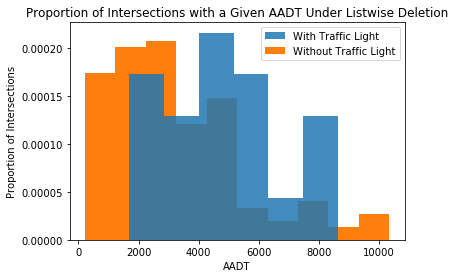

In [50]:
f = open("stats/livingston_intersections_plus.txt",'r')
with_light = []
without = []
for line in f:
    int_plus = json.loads(line)
    
    # if there are at least 3 state directions
    if int_plus['num state directions'] > 2:
        if int_plus['traffic light'] == 1 and int_plus['average AADT'] != None:
            with_light.append(int_plus['average AADT'])
        elif int_plus['average AADT'] != None and int_plus['average AADT'] < 20000:
            without.append(int_plus['average AADT'])
f.close()

plt.hist(with_light, zorder = 2, normed = True, alpha = .85, bins = 'auto')
plt.hist(without, normed = True, bins = 'auto')
plt.legend(['With Traffic Light', 'Without Traffic Light'])
plt.title("Proportion of Intersections with a Given AADT Under Listwise Deletion")
plt.xlabel("AADT")
plt.ylabel("Proportion of Intersections")
plt.show()

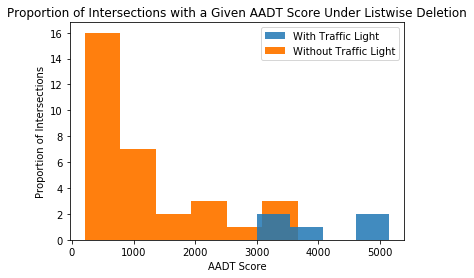

In [62]:
f = open("stats/livingston_intersections_plus.txt",'r')
with_light = []
without = []
for line in f:
    int_plus = json.loads(line)
    
    # if there are at least 3 state directions
    if int_plus['num state directions'] == 4:
        # a metric to evaluate and intersection
        if int_plus['average AADT'] != None:
            mean_value = int_plus['average AADT']
            stdv = int_plus['AADT stdv']
            AADT_score = (-1/(mean_value)*stdv + 1)*mean_value
            
            if int_plus['traffic light'] == 1:
                with_light.append(AADT_score)
            elif int_plus['average AADT'] < 20000:
                without.append(AADT_score)
f.close()

plt.hist(with_light, zorder = 2, normed = False, alpha = .85, bins = 'auto')
plt.hist(without, normed = False, bins = 'auto')
plt.legend(['With Traffic Light', 'Without Traffic Light'])
plt.title("Proportion of Intersections with a Given AADT Score Under Listwise Deletion")
plt.xlabel("AADT Score")
plt.ylabel("Proportion of Intersections")
plt.show()